In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
residue_labels = {
    1: "LYS_68@NZ-BLA_339@O1D-H83",
    2: "LYS_38@NZ-BLA_339@O2D-H80",
    3: "BLA_339@O1D-BLA_339@O1A-H76",
    4: "LYS_68@NZ-BLA_339@O2D-H81",
    5: "LYS_68@NZ-BLA_339@O2D-H80",
    6: "BLA_339@O1D-BLA_339@O2A-H78",
    7: "BLA_339@O2A-BLA_339@O1D-H83",
    8: "LYS_38@NZ-BLA_339@O1D-H82",
    9: "GL4_90@O-BLA_339@O1A-H77",
    10: "BLA_339@O2D-BLA_339@O2A-H79",
    11: "LYS_68@NZ-BLA_339@O1D-H82",
    12: "BLA_339@O2D-BLA_339@O1A-H76",
    13: "BLA_339@O1A-BLA_339@O2D-H81",
    14: "BLA_339@O1A-BLA_339@O1D-H83",
    15: "ARG_347@NH2-BLA_339@O2A-H79",
    16: "ARG_347@NH2-BLA_339@O1A-H77",
    17: "BLA_339@O1D-BLA_339@O2A-H79",
    18: "ARG_347@NH1-BLA_339@O1A-H77",
    19: "PHE_36@O-BLA_339@O1D-H82",
    20: "GL4_60@OE2-BLA_339@O1D-H82",
    21: "ASN_91@ND2-BLA_339@O1A-H77",
    22: "ARG_347@NH1-BLA_339@O2A-H79",
    23: "BLA_339@ND-BLA_339@NA-HA",
    24: "BLA_339@O2A-BLA_339@O2D-H80",
    25: "GLY_457@O-BLA_339@O1A-H77",
    26: "GLY_457@O-BLA_339@O2A-H79",
    27: "BLA_339@O2D-BLA_339@O1A-H77",
    28: "BLA_339@O1A-BLA_339@O2D-H80",
    29: "BLA_339@O2D-BLA_339@O2A-H78",
    30: "BLA_339@O1D-BLA_339@O1A-H77",
    31: "BLA_339@O1A-BLA_339@O1D-H82",
    32: "LYS_35@NZ-BLA_339@O2A-H79",
    33: "BLA_339@O2A-BLA_339@O1D-H82",
    34: "HIP_89@ND1-BLA_339@O1A-H76",
    35: "ALA_458@N-BLA_339@O1A-H77",
    36: "ALA_458@N-BLA_339@O1A-H76",
    37: "SER_459@OG-BLA_339@O1A-H77",
    38: "PHE_36@O-BLA_339@O2D-H80",
    39: "GL4_60@OE2-BLA_339@O2D-H81",
    40: "GL4_60@OE2-BLA_339@O1D-H83",
    41: "ASN_91@ND2-BLA_339@O2A-H79",
    42: "GL4_60@OE1-BLA_339@O2D-H80",
    43: "BLA_339@ND-BLA_339@NC-HC",
    44: "ALA_458@N-BLA_339@O2A-H78",
    45: "LYS_35@NZ-BLA_339@O1A-H77",
    46: "ASN_58@ND2-BLA_339@O1D-H83",
    47: "GL4_60@OE1-BLA_339@O1D-H82",
    48: "GL4_60@OE2-BLA_339@O2D-H80",
    49: "ALA_458@N-BLA_339@O2A-H79",
    50: "LYS_38@NZ-BLA_339@O1A-H77",
    51: "LYS_38@NZ-BLA_339@O2A-H79",
    52: "ASN_91@O-BLA_339@O1A-H77",
    53: "GL4_60@OE1-BLA_339@O2D-H81",
    54: "GL4_90@O-BLA_339@O2A-H79",
    55: "LYS_38@NZ-BLA_339@O1D-H83",
    56: "LYS_38@NZ-BLA_339@O2A-H79"
}

In [7]:
data = np.genfromtxt('bv339/bv339_don_bbhbond.gnu', skip_header=8, skip_footer=2)

frames = data[:, 0]  
pairs = data[:, 1]  
values = data[:, 2]  

In [9]:
unique_frames = np.unique(frames)
unique_pairs = np.unique(pairs)

selected_pair_index = 0 
selected_values = []
num_pairs_per_block = len(unique_pairs)

num_blocks = len(values) // num_pairs_per_block
for block_idx in range(num_blocks):
    start_idx = block_idx * num_pairs_per_block
    end_idx = start_idx + num_pairs_per_block
    
    block_pairs = pairs[start_idx:end_idx]
    block_values = values[start_idx:end_idx]
    
    selected_pair_values = block_values[block_pairs == unique_pairs[selected_pair_index]]
    selected_values.extend(selected_pair_values)

print(np.mean(selected_values))

0.027620663650075414


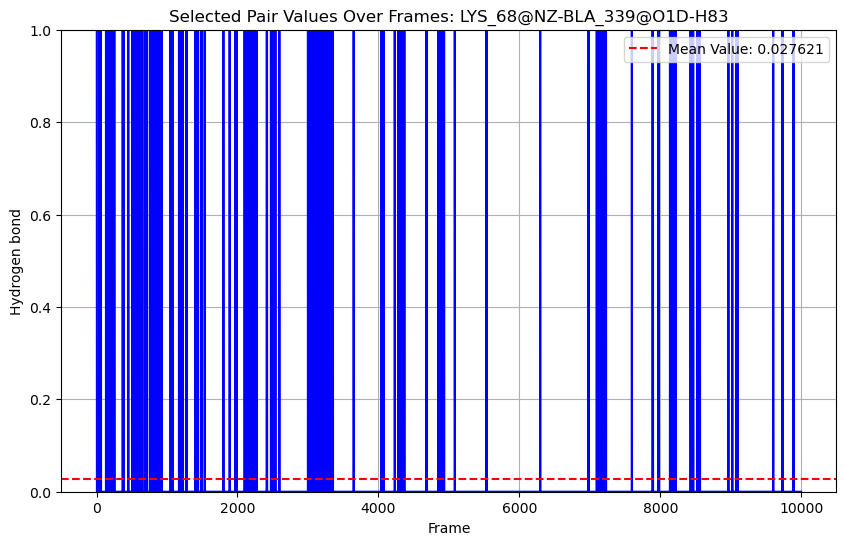

In [11]:
pair_label = residue_labels[selected_pair_index + 1] 
mean_value=np.mean(selected_values)
num_values_to_plot = 10000
values_to_plot = selected_values[:num_values_to_plot]

x_range = range(1, len(values_to_plot) + 1)

plt.figure(figsize=(10, 6))
plt.plot(x_range, values_to_plot, color='blue')
plt.ylim(0, 1)
plt.xlabel('Frame')
plt.ylabel('Hydrogen bond')
plt.title(f'Selected Pair Values Over Frames: {pair_label}')
plt.axhline(y=mean_value, color='red', linestyle='--', label=f'Mean Value: {mean_value:.6f}')
plt.legend(loc='best')
plt.grid(True)
plt.show()